In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

def standardize(df):
    return (df - df.mean()) / df.std()

### Data Import & EDA

In [2]:
data = pd.read_csv('data.csv')
data.head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
5,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,NaN,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46
6,6019001000,4255,Fresno,93706,Fresno,-119.804314,36.697751,80.55,99.92,95-100% (highest scores),...,88.70,79.5,99.41,15.4,97.14,33.3,94.83,95.84,9.94,99.99
7,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,99.91,95-100% (highest scores),...,60.62,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90
8,6019001202,4561,Fresno,93725,Unincorporated Fresno County area,-119.741028,36.702685,79.17,99.90,95-100% (highest scores),...,89.62,72.2,98.12,16.3,97.90,30.8,91.76,87.24,9.05,98.05
9,6077000100,3688,San Joaquin,95202,Stockton,-121.285363,37.953996,77.87,99.89,95-100% (highest scores),...,91.39,78.8,99.31,14.6,96.46,33.1,94.64,95.83,9.94,99.97


In [3]:
data.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone', 'Ozone Pctl',
       'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl',

## Selecting Columns
We will focus primary on poverty level and try to find variables which we believe will correlate most with poverty level. Originally selected the following
-   Total Population
-   California County
-   Unemployment
-   Zip code
-   Poverty Percentile 
-   Lead
-   PM2.5 Pctl

But pivoted to the following

-   Total Population
-   California County
-   Unemployment
-   Zip code
-   Poverty 
-   Lead
-   PM2.5
  
The reasoning behind these choices was that if the data is already standardized it will be difficult to observed the differences between the two counties in exploration.

In [4]:
clean = data[['Total Population', 'California County', 'ZIP', 'Poverty', 'Lead', 'Pollution Burden', 'Asthma', 'Linguistic Isolation', 'Education']].sort_values('Poverty', ascending=False)
clean['Linguistic_Isolation'] = clean['Linguistic Isolation']
clean['Pollution_Burden'] = clean['Pollution Burden']

clean.drop(columns=['Pollution Burden', 'Linguistic Isolation'])

columns = ['Poverty', 'Lead', 'Pollution_Burden', 'Asthma', 'Linguistic_Isolation', 'Education']
std_clean = clean
std_clean = (clean[columns] - clean[columns].mean()) / clean[columns].std()

In [5]:
sd = clean[clean['California County'] == 'San Diego']
la = clean[clean['California County'] == 'Los Angeles']

sd_la = pd.concat([sd, la]).dropna()
sd_la['Is_La'] = sd_la['California County'] == 'Los Angeles'

sd_la.shape

(2845, 12)

<Axes: xlabel='California County', ylabel='Poverty'>

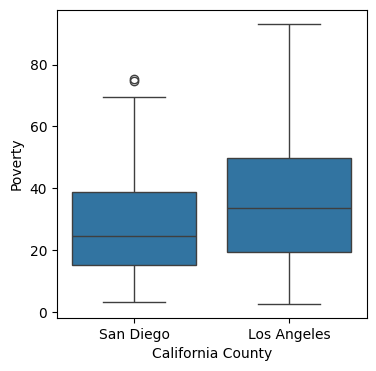

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.boxplot(x='California County', y='Poverty', data=sd_la, ax=ax)

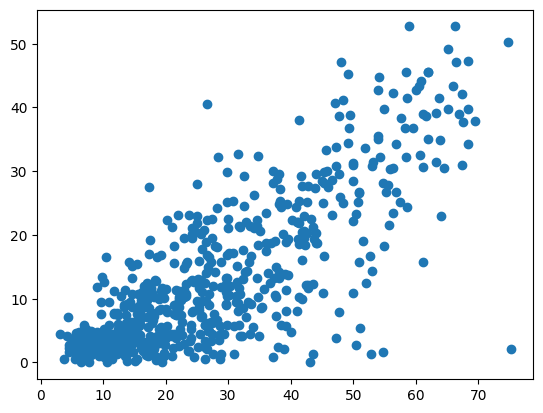

In [7]:
plt.scatter(x=sd['Poverty'],y=sd['Education'])

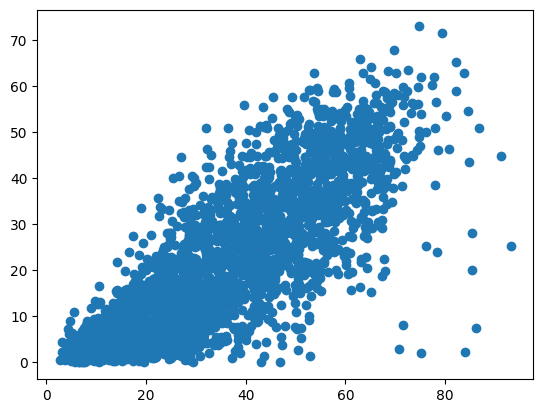

In [8]:
plt.scatter(x=sd_la['Poverty'],y=sd_la['Education'])

In [9]:
model_sd = smf.ols('Poverty ~ Education', sd).fit()
print(model_sd.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7447      0.603     22.792      0.000      12.560      14.929
Education      1.0784      0.034     31.615      0.000       1.011       1.145


In [10]:
model_la = smf.ols('Poverty ~ Education', la).fit()
print(model_la.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7315      0.367     40.162      0.000      14.012      15.451
Education      0.9206      0.013     69.202      0.000       0.894       0.947


In [11]:
model_sd_la = smf.ols('Poverty ~ Education + C(Is_La)', sd_la).fit()

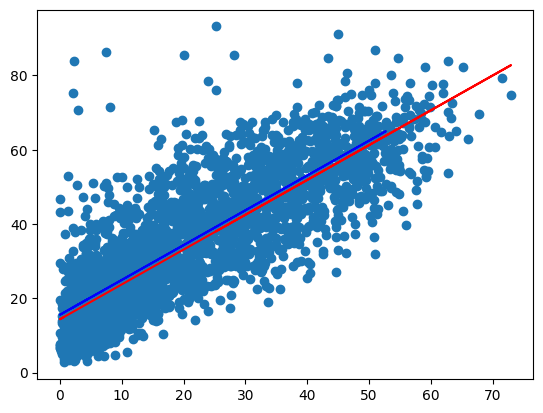

In [12]:
plt.scatter(sd_la['Education'], sd_la['Poverty'])
plt.plot(sd_la['Education'][sd_la.Is_La == 0], model_sd_la.predict(sd_la[sd_la.Is_La == 0]), color='blue')
plt.plot(sd_la['Education'][sd_la.Is_La == 1], model_sd_la.predict(sd_la[sd_la.Is_La == 1]), color='red')

Missingness?: Dropping rows where education is missing. Negligible data loss. 54 from ~2950 rows.

Five Assumptions For Lin. Regression:
1. Linear
2. Independence
3. Heteroscedasticity
4. Normally Distributed Error
5. Completeness

Our model to test:

$\hat{\text{Education}} = \text{Variables}$

The most highly correlated variables were:

- Lead: 0.64
- Pollution Burden: 0.44
- Asthma: 0.44
- Linguistic Iso.: 0.71
- Poverty: 0.78
- Unemployment: 0.39
- Housing Burden: 0.53
- Cardiovascular Disease: 0.47

But to reduce multicollinearity we narrowed it down to five variables:

- Lead: 0.64
- Pollution Burden: 0.44
- Asthma: 0.44
- Linguistic Isolation: 0.71
- Poverty: 0.78

In [13]:
def present(feature_x, feature_y):
    plt.scatter(x=sd_la[feature_x],y=sd_la[feature_y])

In [14]:
'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 
'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 
'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden',
'Asthma', 'Asthma Pctl', 'Low Birth Weight',  


'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden', 
'Pop. Char. ', 'Cardiovascular Disease', 'Education'

('Pop. Char. ', 'Cardiovascular Disease', 'Education')

<Axes: >

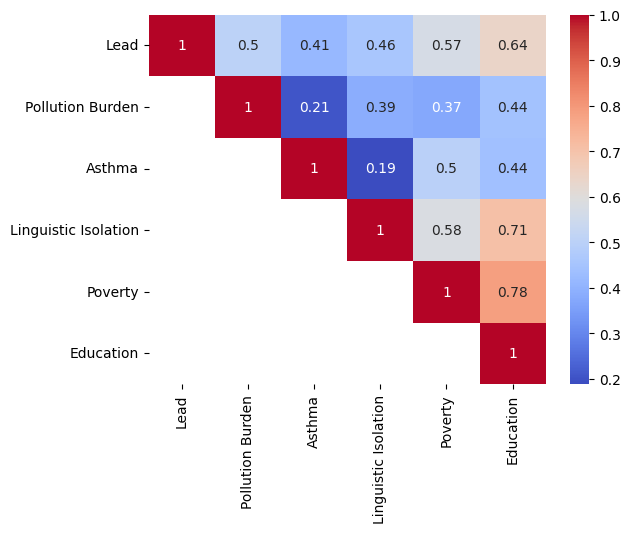

In [15]:
drop_data = data[['Lead', 'Pollution Burden', 'Asthma', 'Linguistic Isolation', 'Poverty', 'Education']]
variables = drop_data.columns
corr_table = drop_data[variables].corr() 
sns.heatmap(corr_table, annot=True, cmap='coolwarm', mask=np.tril(corr_table, k=-1))

## Does the poverty in SD and LA come from the same distribution?
To answer this question, we will use the Wald-Wolfowitz runs test. The **Wald-Wolfowitz runs test** is a nonparametric test for two independent samples. The test is used to determine if the two samples are from the same distribution, as mentioned in lecture. 

### Basic test anatomy

$$
X_1, X_2, \dots, X_n \sim F_X \quad \text{and} \quad Y_1, Y_2, \dots, Y_m \sim F_Y
$$

and, 

$$
H_0: F_X = F_Y \quad \quad \text{vs} \quad \quad H_a: F_X \neq F_Y


In [16]:
R, pvalue = statsmodels.sandbox.stats.runs.runstest_2samp(
    sd['Poverty'], 
    la['Poverty']
)
alpha = 0.05
if pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

REJECT NULL


Interestingly, this seems to suggest there evidence that the distribution of poverty in San Diego and Los Angeles are different. For the small level of alpha, we could test whether the two-sample K-S Test agrees with the results above.


In [17]:
KS_result = stats.kstest(sd['Poverty'], la['Poverty'])
if KS_result.pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

FAIL TO REJECT NULL


The results seem to agree again implying their is evidence for the alternate hypothesis.

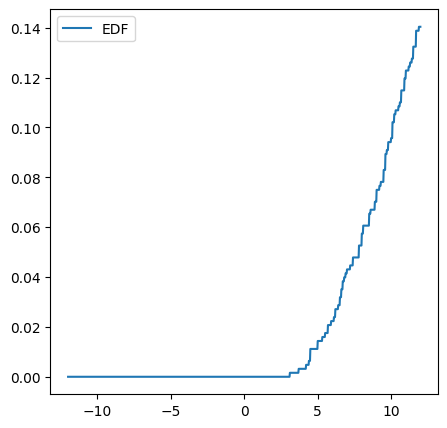

In [18]:
xrange = np.linspace(-12, 12, 1000)
sd_ecdf= np.array([sum(sd['Poverty'] < x) for x in xrange]) / len(sd)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(xrange, sd_ecdf, label='EDF')
ax.legend()

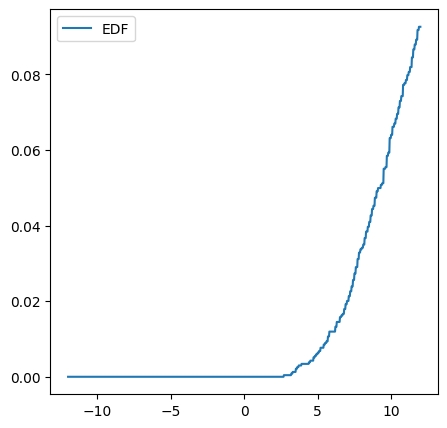

In [19]:
xrange = np.linspace(-12, 12, 1000)
la_ecdf= np.array([sum(la['Poverty'] < x) for x in xrange]) / len(la)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(xrange, la_ecdf, label='EDF')
ax.legend()

### Shapiro-Wilk Test

We can run the shapiro-wilk test to check if our data is normally distributed. The anatomy of the test is the following 
$$
\begin{aligned}
H_{0}: X_{1},X_{2},...,,X_{n} \sim N(\mu,\sigma^{2}) \text{ for some } \mu \in \mathbb{R}, \sigma > 0 \\ 
H_{a}: X_{1},X_{2},...,,X_{n} \ne N(\mu,\sigma^{2}) \text{ for some } \mu \in \mathbb{R}, \sigma > 0 
\end{aligned}
$$

#### SD Shapiro-Wilk test

In [20]:
sd_pvalue = stats.shapiro(sd['Poverty']).pvalue
if sd_pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

FAIL TO REJECT NULL


#### LA Shapiro-Wilk Test

In [21]:
la_pvalue = stats.shapiro(la['Poverty']).pvalue
if la_pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

FAIL TO REJECT NULL


There seems to be evidence that both poverty levels in San Diego and Los Angeles follow a normal distribution for an alpha level of .05

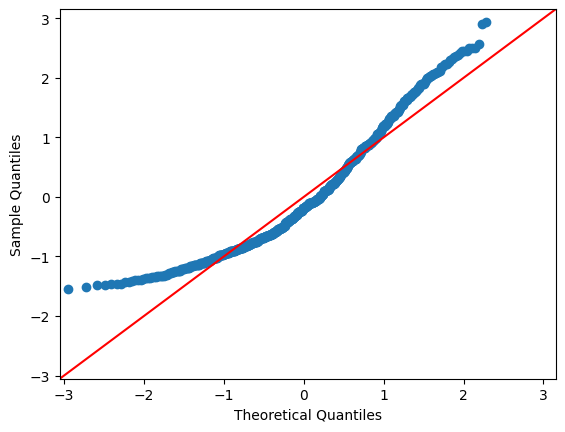

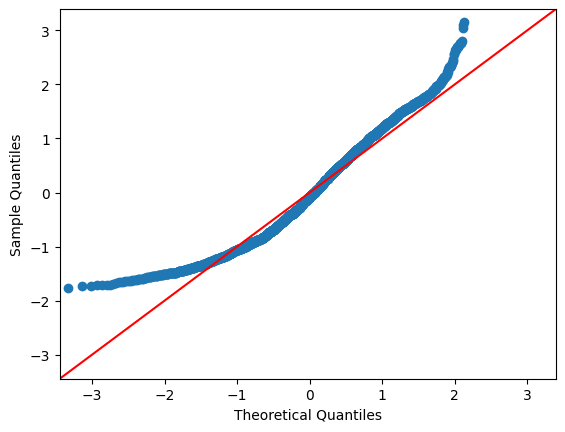

In [22]:
sm.qqplot((sd['Poverty'] - sd['Poverty'].mean()) / np.std(sd['Poverty']), stats.norm, line='45')
sm.qqplot((la['Poverty'] - la['Poverty'].mean()) / np.std(la['Poverty']), stats.norm, line='45')
hide = []

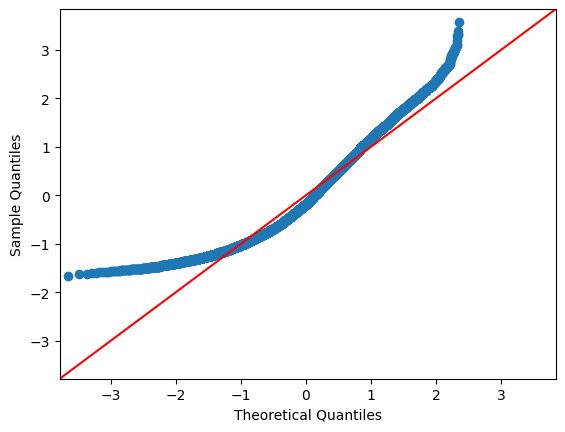

In [23]:
hide = sm.qqplot(std_clean['Poverty'], stats.norm, line='45')

<Axes: xlabel='Poverty', ylabel='Count'>

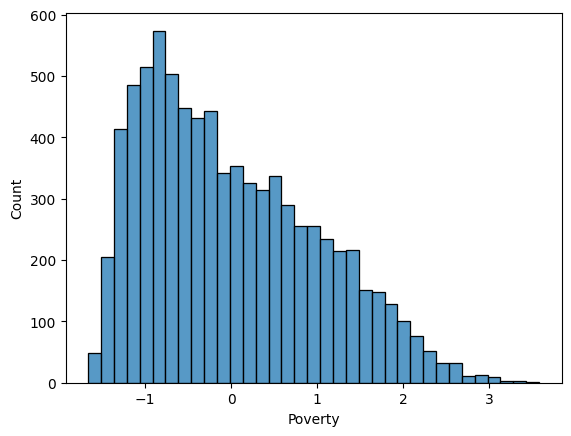

In [24]:
sns.histplot(data=standardize(data['Poverty']))

In [25]:
model = smf.ols('Education ~ Poverty + Lead + Asthma + Linguistic_Isolation + Pollution_Burden', sd_la).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Education   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1976.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:05:05   Log-Likelihood:                -9795.6
No. Observations:                2845   AIC:                         1.960e+04
Df Residuals:                    2839   BIC:                         1.964e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -11.5485      0.619    -18.666      0.000     -12.762     -10.335
Poverty                  0.3828      0.013     28.855      0.000       0.357       0.409
Lead                     0.2206      0.009     23.963      0.000       0.203       0.239
Asthma                   0.0562      0.007      8.333      0.000       0.043       0.069
Linguistic_Isolation     0.3447      0.019     17.682      0.000       0.306       0.383
Pollution_Burden        -0.0152      0.015     -1.047      0.295      -0.044       0.013
==============================================================================
Omnibus:                        9.349   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               11.777
Skew:                           0.006   Prob(JB):                      0.00277
Kurtosis:                       3.315   Cond. No.                         449.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Assumptions

### Independence of residuals

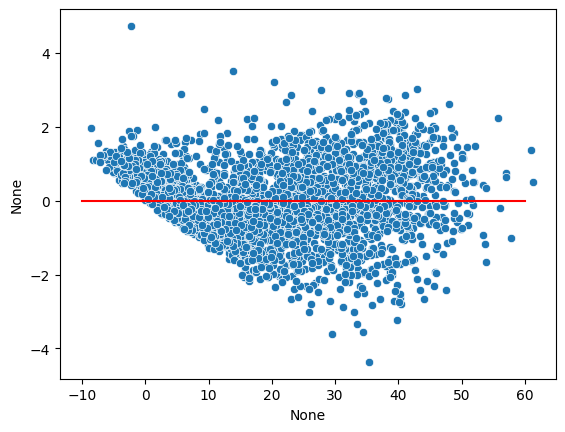

In [26]:
def standardize(X):
    return (X - X.mean()) / X.std()
sns.scatterplot(x=model.fittedvalues, y=standardize(model.resid))
plt.plot(np.linspace(-10, 60, 100), np.zeros(100), 'r')

### Normality of Residuals

(array([0.00386051, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00772101, 0.        ,
        0.        , 0.00386051, 0.00386051, 0.        , 0.00772101,
        0.        , 0.00772101, 0.01158152, 0.01930253, 0.00772101,
        0.01544203, 0.02316304, 0.03088405, 0.02316304, 0.04246557,
        0.0579076 , 0.04632608, 0.07334963, 0.06948912, 0.07334963,
        0.12739672, 0.14669925, 0.10423368, 0.14669925, 0.16986229,
        0.15442027, 0.20846736, 0.23935141, 0.25865395, 0.34358509,
        0.36288763, 0.33200357, 0.42465573, 0.47484232, 0.41693472,
        0.4053532 , 0.45167928, 0.44009776, 0.38605067, 0.33586408,
        0.33586408, 0.33586408, 0.32042205, 0.289538  , 0.31270104,
        0.30111952, 0.25479344, 0.30498003, 0.289538  , 0.27409597,
        0.22390939, 0.1737228 , 0.18916483, 0.12353621, 0.15828077,
        0.1158152 , 0.10423368, 0.05404709, 0.0579076 , 0.06562861,
        0.04632608, 0.03474456, 0.03088405, 0.03

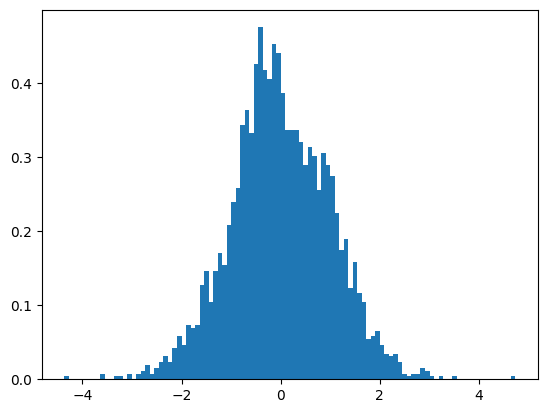

In [27]:
plt.hist(standardize(model.resid), bins=100, density=True)

In [28]:
residuals_pvalue = stats.shapiro(standardize(model.resid)).pvalue
if residuals_pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

residuals_pvalue 

REJECT NULL


0.002394583377052673

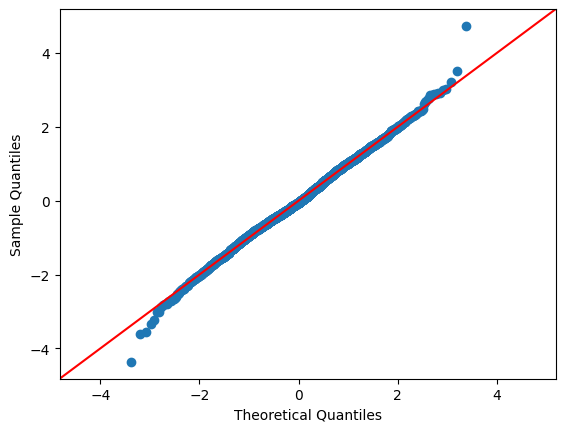

In [29]:
qq = sm.qqplot(standardize(model.resid), stats.norm, line='45')

### Check for Independence

<BarContainer object of 21 artists>

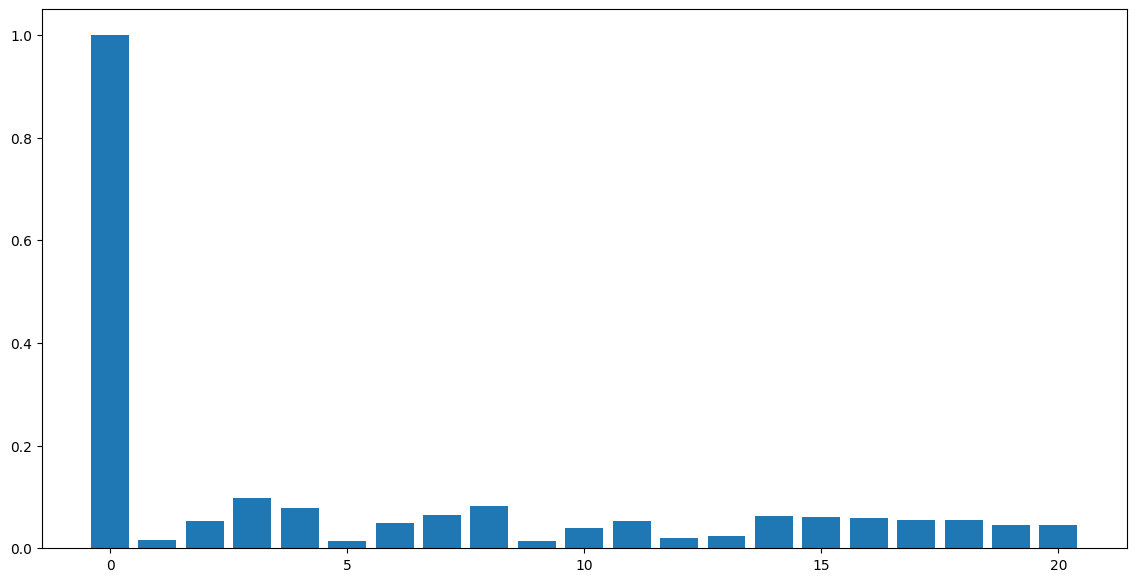

In [30]:
from statsmodels.tsa.stattools import acf

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

lags = 20
ax.bar(range(lags+1), acf(model.resid, nlags=lags))

### Heteroscedasticity


<Axes: xlabel='None', ylabel='None'>

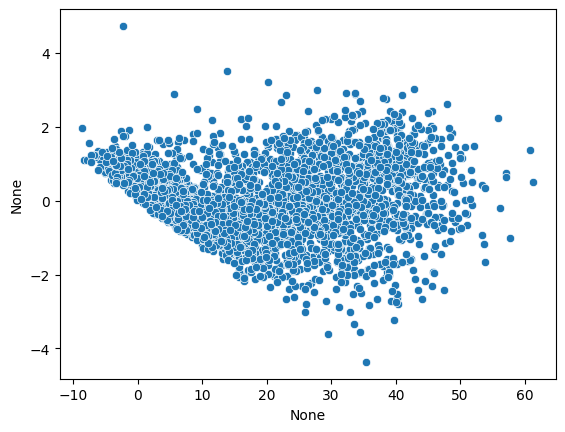

In [31]:
columns = ['Poverty', "Lead", "Asthma", "Linguistic_Isolation", "Pollution_Burden", 'Is_La']
sns.scatterplot(x=model.predict(sd_la[columns]), y=standardize(model.resid))

### Completeness

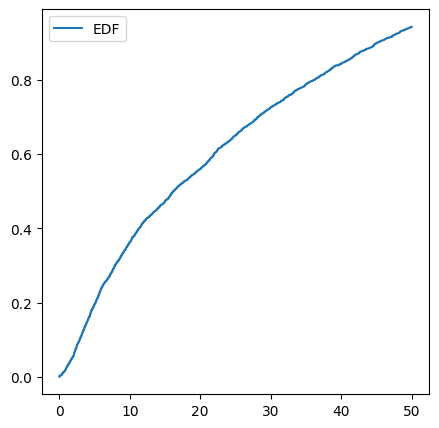

In [32]:
xrange = np.linspace(0, 50, 1000)
sd_la_ecdf= np.array([sum(sd_la['Education'] < x) for x in xrange]) / len(sd_la)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(xrange, sd_la_ecdf, label='EDF')
ax.legend()

## Model with Interaction Terms

In [33]:
model2 = smf.ols('Education ~ Lead + Pollution_Burden + Poverty + Linguistic_Isolation + Asthma + Linguistic_Isolation:C(Is_La) + Poverty:C(Is_La) + Asthma:C(Is_La) + Lead:C(Is_La) + Pollution_Burden:C(Is_La) + C(Is_La)', sd_la).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Education   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     994.2
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:05:06   Log-Likelihood:                -9679.9
No. Observations:                2845   AIC:                         1.938e+04
Df Residuals:                    2833   BIC:                         1.946e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -2.2569      1.208     -1.868      0.062      -4.626       0.113
C(Is_La)[T.True]                        -15.2551      1.457    -10.467      0.000     -18.113     -12.397
Lead                                      0.1041      0.023      4.488      0.000       0.059       0.150
Lead:C(Is_La)[T.True]                     0.1593      0.025      6.317      0.000       0.110       0.209
Pollution_Burden                         -0.0691      0.035     -1.980      0.048      -0.137      -0.001
Pollution_Burden:C(Is_La)[T.True]         0.1143      0.039      2.960      0.003       0.039       0.190
Poverty                                   0.2115      0.033      6.405      0.000       0.147       0.276
Poverty:C(Is_La)[T.True]                  0.1802      0.036      4.984      0.000       0.109       0.251
Linguistic_Isolation                      0.7806      0.065     11.927      0.000       0.652       0.909
Linguistic_Isolation:C(Is_La)[T.True]    -0.4671      0.069     -6.809      0.000      -0.602      -0.333
Asthma                                    0.0751      0.020      3.822      0.000       0.037       0.114
Asthma:C(Is_La)[T.True]                  -0.0212      0.021     -1.015      0.310      -0.062       0.020
==============================================================================
Omnibus:                       18.874   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.065
Skew:                           0.033   Prob(JB):                     1.33e-06
Kurtosis:                       3.473   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Assumptions

## Linearity and  Heteroscedasticity

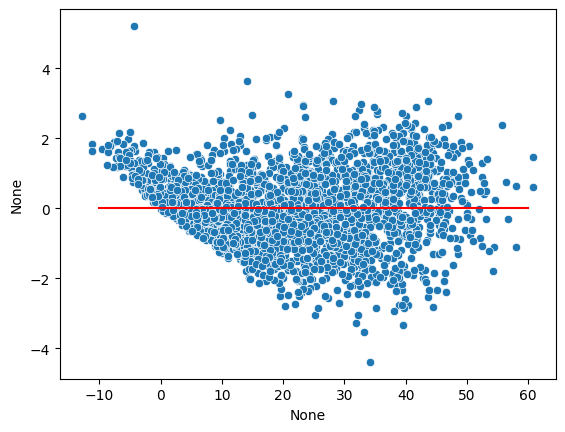

In [34]:
sns.scatterplot(x=model2.fittedvalues, y=standardize(model2.resid))
plt.plot(np.linspace(-10, 60, 100), np.zeros(100), 'r')

### Residual Normality

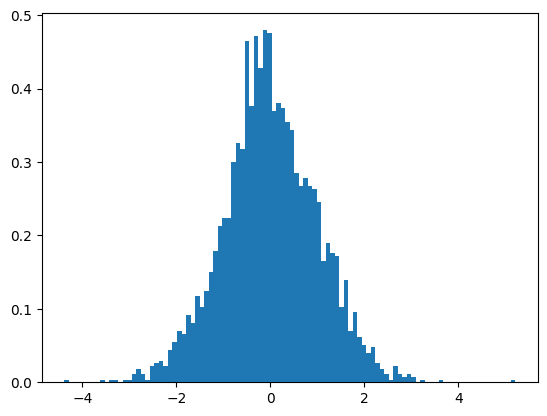

In [35]:
hide = plt.hist(standardize(model2.resid), bins=100, density=True)

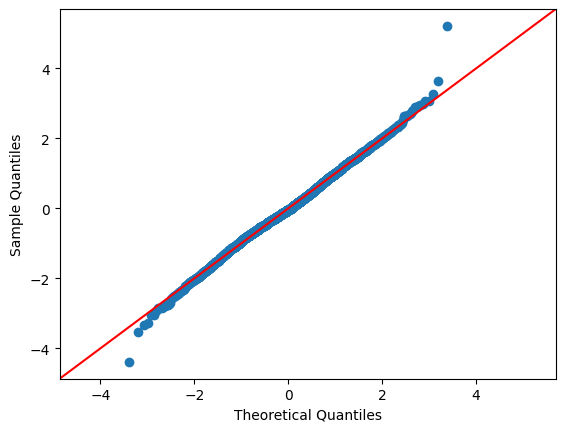

In [36]:
qq = sm.qqplot(standardize(model2.resid), stats.norm, line='45')

In [37]:
residuals_pvalue = stats.shapiro(standardize(model.resid)).pvalue
if residuals_pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

residuals_pvalue 

REJECT NULL


0.002394583377052673

### Check for Independence

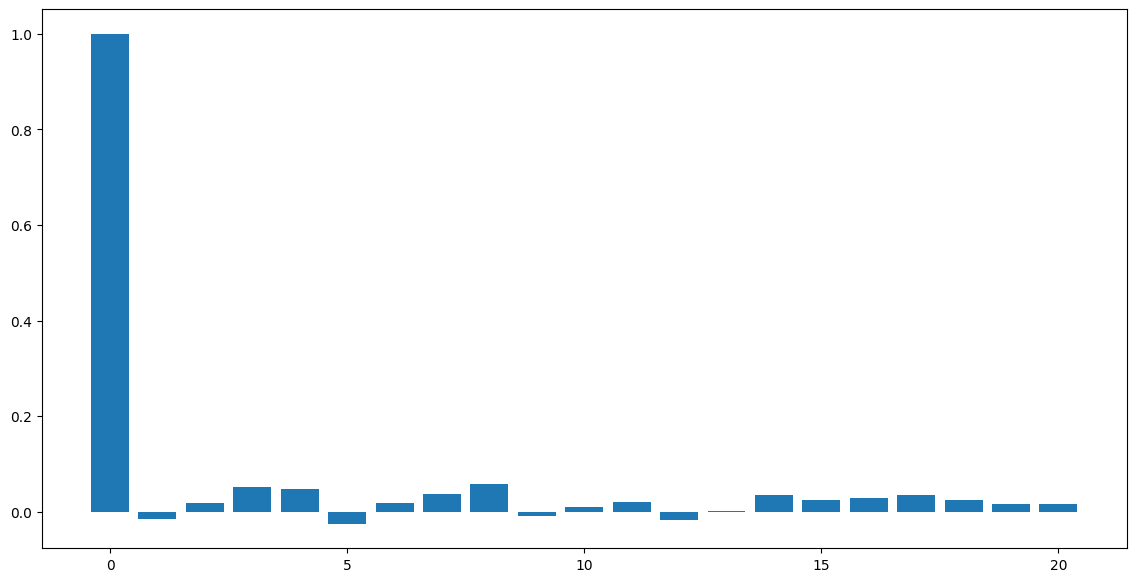

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

lags = 20
hide = ax.bar(range(lags+1), acf(model2.resid, nlags=lags))

### Completeness

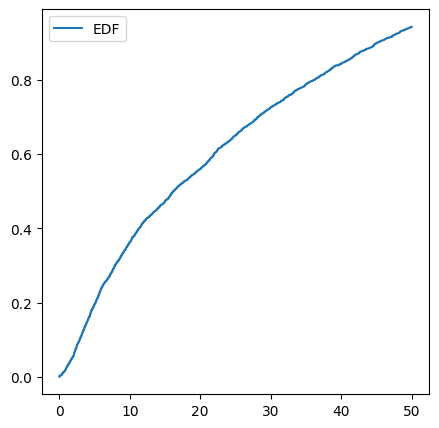

In [39]:
xrange = np.linspace(0, 50, 1000)
sd_la_ecdf= np.array([sum(sd_la['Education'] < x) for x in xrange]) / len(sd_la)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(xrange, sd_la_ecdf, label='EDF')
ax.legend()

In [41]:
# https://plotly.com/python/county-choropleth/

import plotly.figure_factory as ff

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[20, 40, 60, 80], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```